In [1]:
import numpy as np
import pickle as pkl
import pandas as pd
import os

In [2]:
os.chdir('../../../..')
print(os.getcwd())

c:\Users\Paul\Documents\X\4A\S1\HMM\poisson_network_models


In [3]:
# retrieve filenames
directory = 'data/hyperparams_tuning/'
hyperparams_tuning_filenames = os.listdir(directory)
results = {}

# iterate over filenames
for filename in hyperparams_tuning_filenames:
    # get results
    _name,t1,t2,_ = filename.split('_')
    content = pkl.load(open(directory + filename, 'rb'))
    t1,t2 = float(t1), float(t2)

    # save results
    if t1 not in results:
        results[t1] = {}
    if t2 not in results[t1]:
        results[t1][t2] = []
    results[t1][t2].append(content)

# # save results
# pkl.dump(results, open('data/hyperparams_tuning_results.pkl', 'wb'))

# Number of iterations

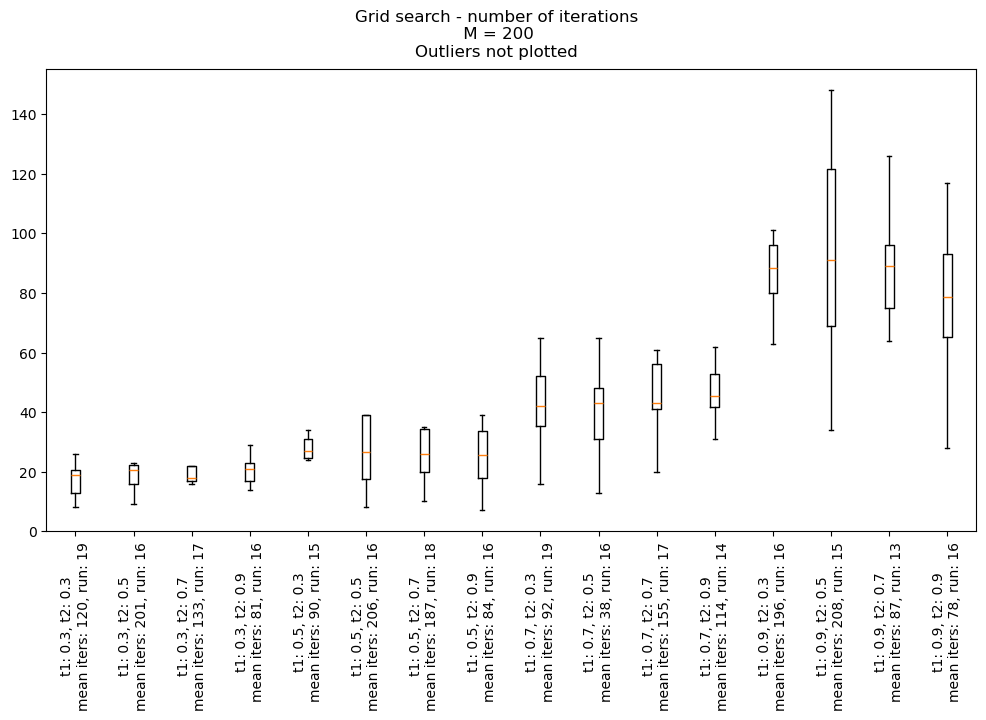

In [4]:
import matplotlib.pyplot as plt

# Initialize a 3x3 subplot grid
fig, ax = plt.subplots(figsize=(12, 6))
xticks_labels = []

# retrieve the results
for i,t1 in enumerate(results.keys()):
    for j,t2 in enumerate(results[t1].keys()):
        num_iters = []
        for result in results[t1][t2]:
            num_iters.append(len(result.shared["exponents"]))

        # Set the x position for the boxplot
        x_position = i * len(results[t1].keys()) + j

        # Plot the boxplot at the specified x position
        ax.boxplot(num_iters, showfliers=False, positions=[x_position])

        # Set the text at the right position
        text = "t1: {}, t2: {}\nmean iters: {}, run: {}".format(t1, t2, int(np.mean(num_iters)), len(num_iters))
        xticks_labels.append(text)    

ax.set_xticklabels(xticks_labels,rotation=90)

# Adjust layout for better spacing
# plt.tight_layout()
fig.suptitle("Grid search - number of iterations\n M = 200\nOutliers not plotted")

# Show the plot
plt.show()

# Other metrics

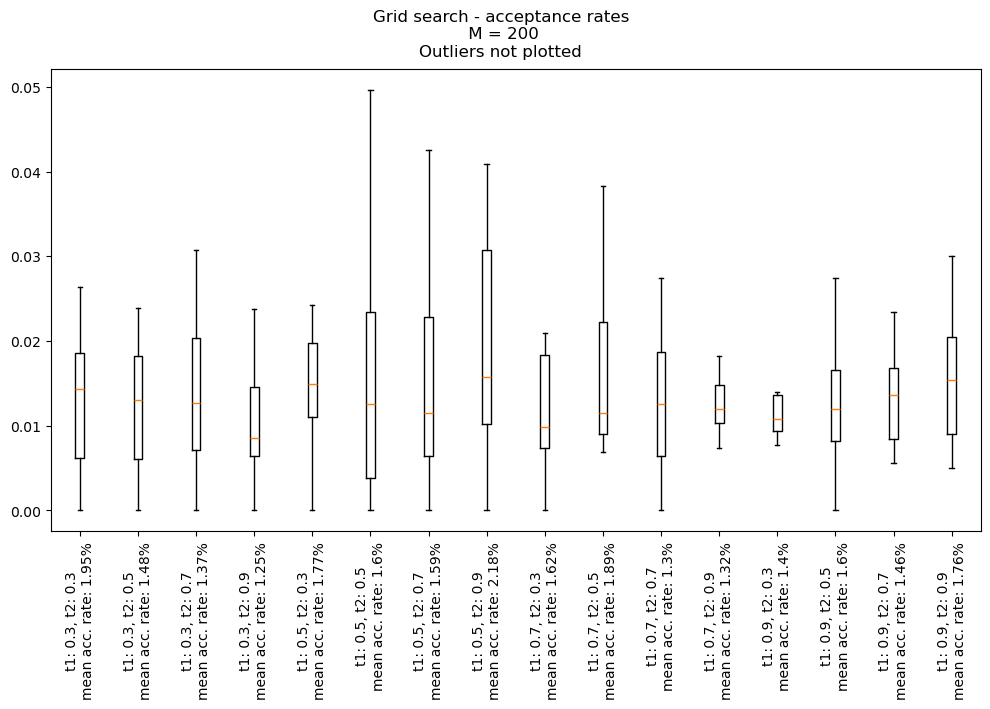

In [10]:
import matplotlib.pyplot as plt

# Initialize a 3x3 subplot grid
fig, ax = plt.subplots(figsize=(12, 6))
xticks_labels = []

# retrieve the results
for i,t1 in enumerate(results.keys()):
    for j,t2 in enumerate(results[t1].keys()):
        acc_rates = []
        for result in results[t1][t2]:
            acc_rates.append(np.mean(result.shared["acc_rates"]))

        # Set the x position for the boxplot
        x_position = i * len(results[t1].keys()) + j

        # Plot the boxplot at the specified x position
        ax.boxplot(acc_rates, showfliers=False, positions=[x_position])

        # Set the text at the right position
        text = "t1: {}, t2: {}\nmean acc. rate: {}%".format(t1, t2, round(100*np.mean(acc_rates),2))
        xticks_labels.append(text)    

ax.set_xticklabels(xticks_labels,rotation=90)

# Adjust layout for better spacing
# plt.tight_layout()
fig.suptitle("Grid search - acceptance rates\n M = 200\nOutliers not plotted")

# Show the plot
plt.show()

In [ ]:
len(results[0.3][0.3][0].theta[0])

2

In [ ]:
import matplotlib.pyplot as plt

# Initialize a 3x3 subplot grid
fig, ax = plt.subplots(figsize=(12, 6))
xticks_labels = []

# retrieve the results
for i,t1 in enumerate(results.keys()):
    for j,t2 in enumerate(results[t1].keys()):
        num_iters = []
        for result in results[t1][t2]:
            llh_var = np.mean(np.var(result.X["llh"], axis=1))
            num_iters.append()

        # Set the x position for the boxplot
        x_position = i * len(results[t1].keys()) + j

        # Plot the boxplot at the specified x position
        ax.boxplot(num_iters, showfliers=False, positions=[x_position])

        # Set the text at the right position
        text = "t1: {}, t2: {}\nmean iters: {}, run: {}".format(t1, t2, int(np.mean(num_iters)), len(num_iters))
        xticks_labels.append(text)    

ax.set_xticklabels(xticks_labels,rotation=90)

# Adjust layout for better spacing
# plt.tight_layout()
fig.suptitle("Grid search - llh variance\n M = 200\nOutliers not plotted")

# Show the plot
plt.show()